In [209]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [210]:
# standard libraries and classes
import os
import sys
import time
import string
import logging
import cProfile
import pstats
import pprint
import collections

from os import walk
from io import StringIO

# third party imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xgboost as xgb
import seaborn as sns


# frequently used classes

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import log_loss, accuracy_score, precision_score, recall_score, roc_auc_score
from IPython.core.debugger import Tracer
from IPython.display import display, Image
from functools import wraps
from datetime import datetime as dt
from pandas import DataFrame
from xgboost.sklearn import XGBClassifier
from scipy.stats import randint, uniform
from six.moves import cPickle as pickle
#from __future__ import print_function


# custom imports and settings

import helper_functions as hf
%reload_ext autoreload
%autoreload 2
%reload_ext version_information
%matplotlib inline
version_list = %version_information numpy, scipy, matplotlib, pandas, scikit-learn, xgboost, tensorflow
version_list_html= hf.dict_to_html(version_list.__dict__['packages'])
plt.rcParams['figure.figsize'] = (20,10)

In [211]:
# run_pickle = hf.pickler('runpickles/20170905/run_20170905153659')
# pprint.pprint(run_pickle)
# context = run_pickle['run context']

In [212]:
context = hf.fetch_paths()
pickled = hf.pickler(context['pickle'], context, 'run context')
hf.objects_growth(context['summary'], 'Beginning Heap')
hf.write_dict({'Installed Versions':version_list.__dict__['packages']}, context['summary'], 'Software Versions')
hf.write_dict(context, context['summary'], 'Run time Context')

#profiler = cProfile.Profile()


{'log path': 'logs/20170914/',
 'model path': 'savedmodels/20170914/',
 'modelpickles': 'savedmodels/20170914/pickled_20170914045759',
 'pickle': 'runpickles/20170914/run_20170914045759',
 'plot path': 'plots/20170914/run_045759/',
 'run date': '20170914',
 'run time': '045759',
 'runprofiles path': 'runprofiles/20170914/',
 'stats path': 'stats/20170914/',
 'statsfile': 'stats/20170914/stats_20170914045759',
 'summary': 'runprofiles/20170914/summary_20170914045759.txt'}

In [213]:
load_stats ={}

size = 50
image_size =28
num_labels =  10

data_pickle_path = '../../../tensorflow/tensorflow/examples/udacity/notMNIST.pickle'

with open(data_pickle_path, 'rb') as f:
    data = pickle.load(f)

train_dataset = data['train_dataset']
length = train_dataset.shape[0]
train_dataset = train_dataset.reshape(length, image_size*image_size)

valid_dataset = data['valid_dataset']
length = valid_dataset.shape[0]
valid_dataset = valid_dataset.reshape(length, image_size*image_size)

test_dataset = data['test_dataset']
length = valid_dataset.shape[0]
test_dataset = test_dataset.reshape(length, image_size*image_size)

valid_labels = data['valid_labels']
train_labels = data['train_labels']
test_labels = data['test_labels']

#be nice to your RAM
del data

load_stats.update({'training dataset': train_dataset.shape})
load_stats.update({'training labels': train_labels.shape})
load_stats.update({'validations dataset': valid_dataset.shape})
load_stats.update({'validation labels': valid_labels.shape})
load_stats.update({'test dataset': test_dataset.shape})
load_stats.update({'test labels': test_labels.shape})

############## WRITE TO SUMMARY FILE
hf.write_dict(load_stats, context['summary'],'Dataset Details')

datasets = [train_dataset, valid_dataset, test_dataset]
labels = [train_labels, valid_labels, test_labels]

trial_datasets = [valid_dataset, test_dataset, train_dataset]
trial_labels = [valid_labels, test_labels, train_labels]

#test_datasets =[]
#test_labels =[]

In [215]:
tree_tuner = XGBClassifier(
                        learning_rate = 0.4,
                        n_estimators = 600,
                        max_depth = 3,
                        min_child_weight=1,
                        gamma = 0,
                        subsample = 0.7,
                        colsample_bytree = 0.7,
                        objective= 'multi:softmax',
                        #num_class=10,
                        #n_jobs=-1,
                        #scale_pos_weight=0,
                        seed=27)


Model Report
Accuracy : 0.99910
Optimal Boosters : 146


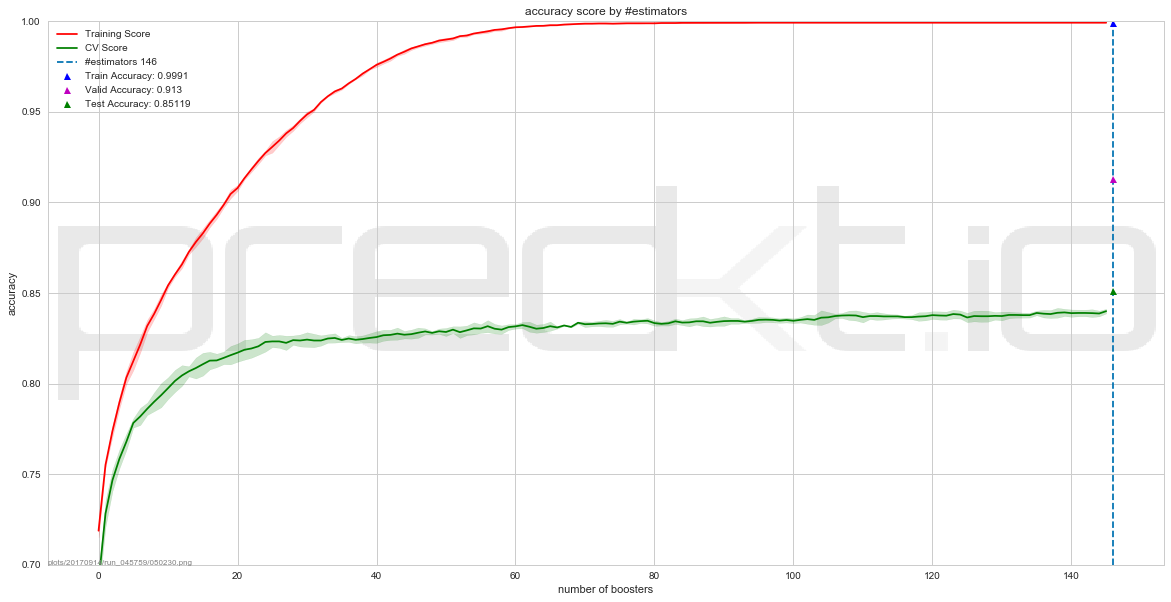

In [218]:
initial_result = hf.modelfit(tree_tuner, trial_datasets, trial_labels, context, 'merror', num_labels = num_labels, cv_folds=3)


In [219]:
## TUNER PARAMETERS

# set ranges for parameters to be tuned by GridSearch. Includes upper limit
allowed_ranges = {
    'colsample_bylevel': [0,1],
    'colsample_bytree': [0,1],
    'gamma': [0,1],
    'learning_rate': [0,1],
    #'max_delta_step': 0,
    'max_depth': [1,10],
    'min_child_weight': [1,10],
    #'missing': None,
    #'reg_alpha': [0,100],
    'reg_lambda': [1,10],
    'scale_pos_weight': [1,5],
    'subsample': [0,1]}

# set magnitude of steps to traverse while fine-tuning grid search
steps = {
    'colsample_bylevel': 0.05,
    'colsample_bytree': 0.05,
    'gamma': 0.1,
    'learning_rate': 0.01,
    #'max_delta_step': 0,
    'max_depth': 1,
    'min_child_weight': 1,
    #'missing': None,
    #'reg_alpha': [0,100],
    'reg_lambda': 0.25,
    'scale_pos_weight': 1,
    'subsample': 0.05}

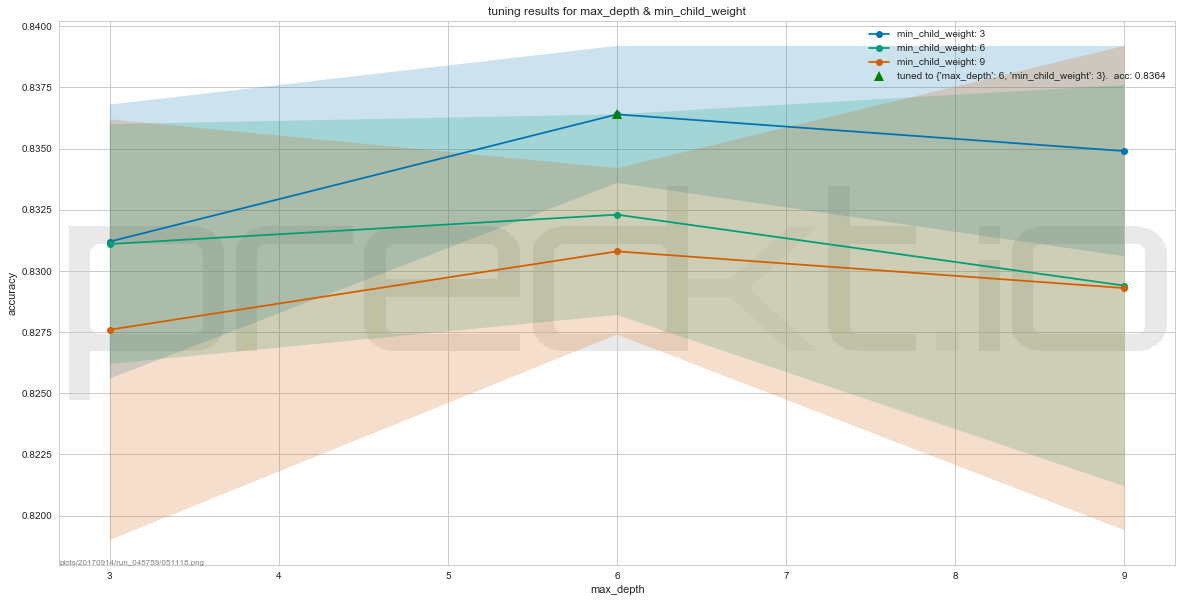

Current Iteration  {'max_depth': 6, 'min_child_weight': 3}  CV Accuracy  0.8364  Validation Accuracy  0.915
parameter max_depth
result: 6  step: 1  allowed_range: [1, 10]  seen: [3.0, 6.0, 9.0]
[7, 5]
parameter min_child_weight
result: 3  step: 1  allowed_range: [1, 10]  seen: [3.0, 6.0, 9.0]
[4, 2]
Extended List : {'max_depth': [7, 5], 'min_child_weight': [4, 2]}
-------------------------------


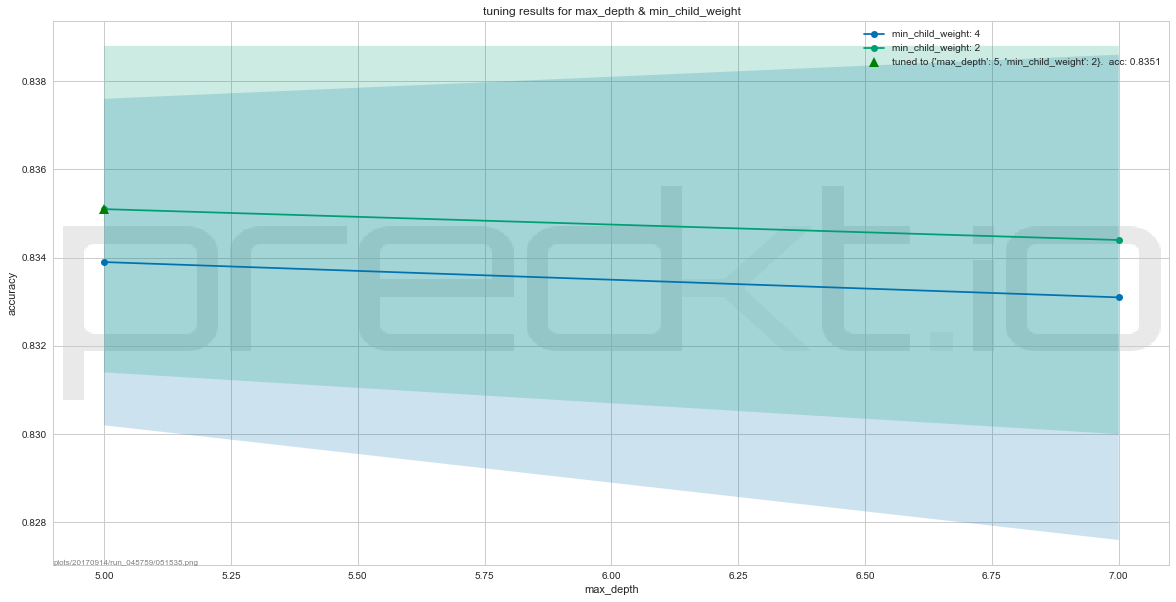

Current Iteration  {'max_depth': 5, 'min_child_weight': 2}  CV Accuracy  0.8351  Validation Accuracy  0.9173
parameter max_depth
result: 5  step: 1  allowed_range: [1, 10]  seen: [3.0, 6.0, 9.0, 7.0, 5.0]
[4]
parameter min_child_weight
result: 2  step: 1  allowed_range: [1, 10]  seen: [3.0, 6.0, 9.0, 4.0, 2.0]
[]
Extended List : {'max_depth': [4], 'min_child_weight': [2]}
-------------------------------


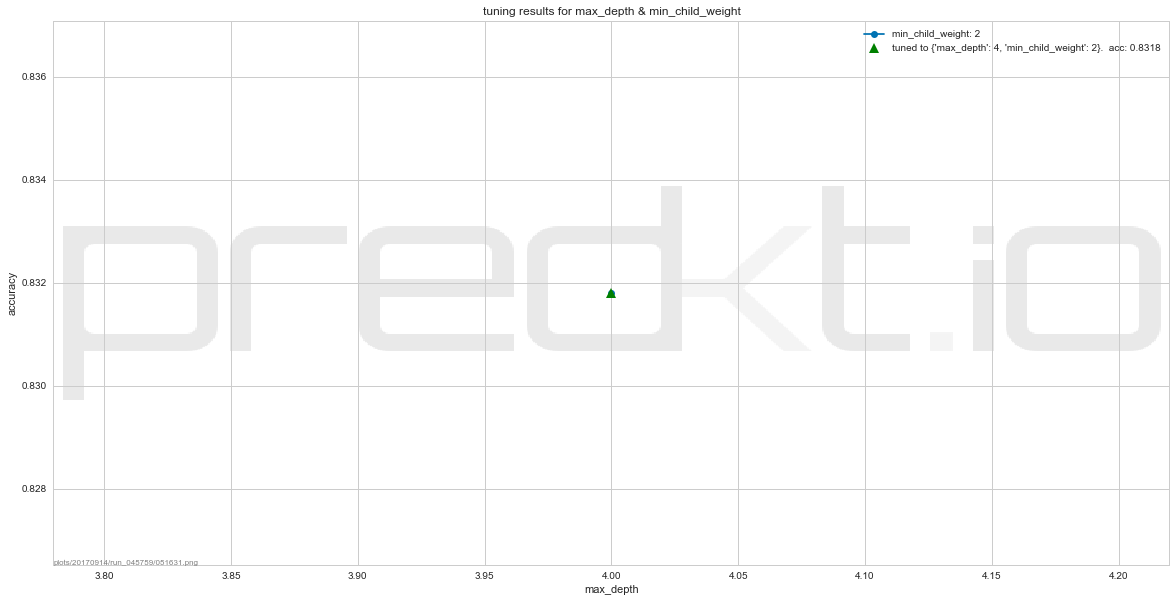

Current Iteration  {'max_depth': 4, 'min_child_weight': 2}  CV Accuracy  0.8318  Validation Accuracy  0.9172
parameter max_depth
result: 4  step: 1  allowed_range: [1, 10]  seen: [3.0, 6.0, 9.0, 7.0, 5.0, 4.0]
[]
parameter min_child_weight
result: 2  step: 1  allowed_range: [1, 10]  seen: [3.0, 6.0, 9.0, 4.0, 2.0]
[]
Extended List : {'max_depth': [4], 'min_child_weight': [2]}
-------------------------------


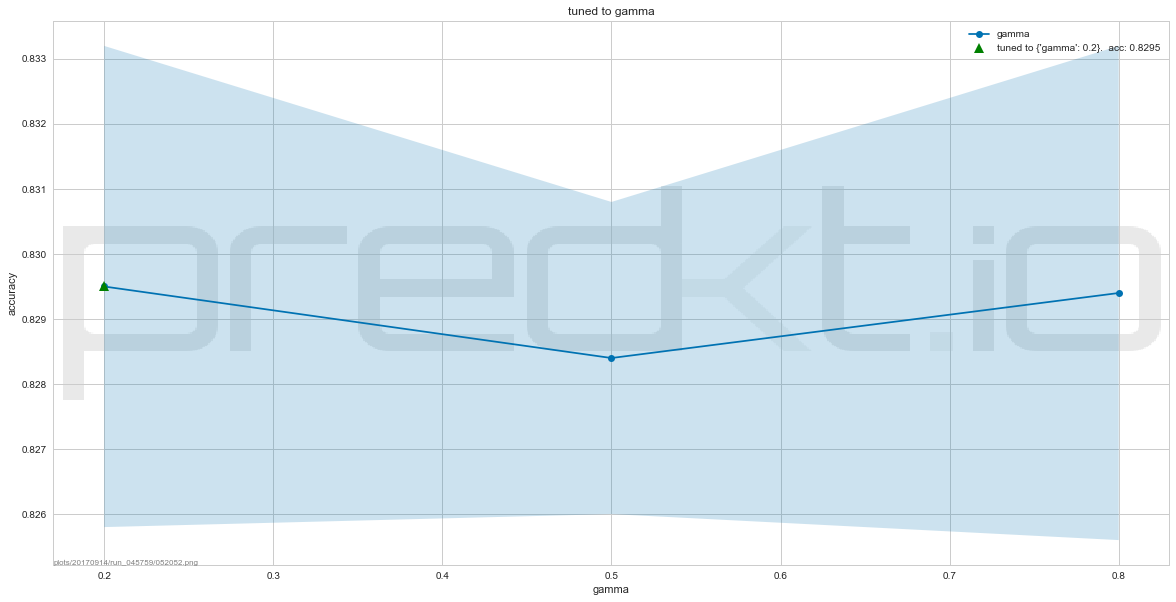

Current Iteration  {'gamma': 0.2}  CV Accuracy  0.8295  Validation Accuracy  0.9141
parameter gamma
result: 0.2  step: 0.1  allowed_range: [0, 1]  seen: [0.2, 0.5, 0.8]
[0.3, 0.1]
Extended List : {'gamma': [0.3, 0.1]}
-------------------------------


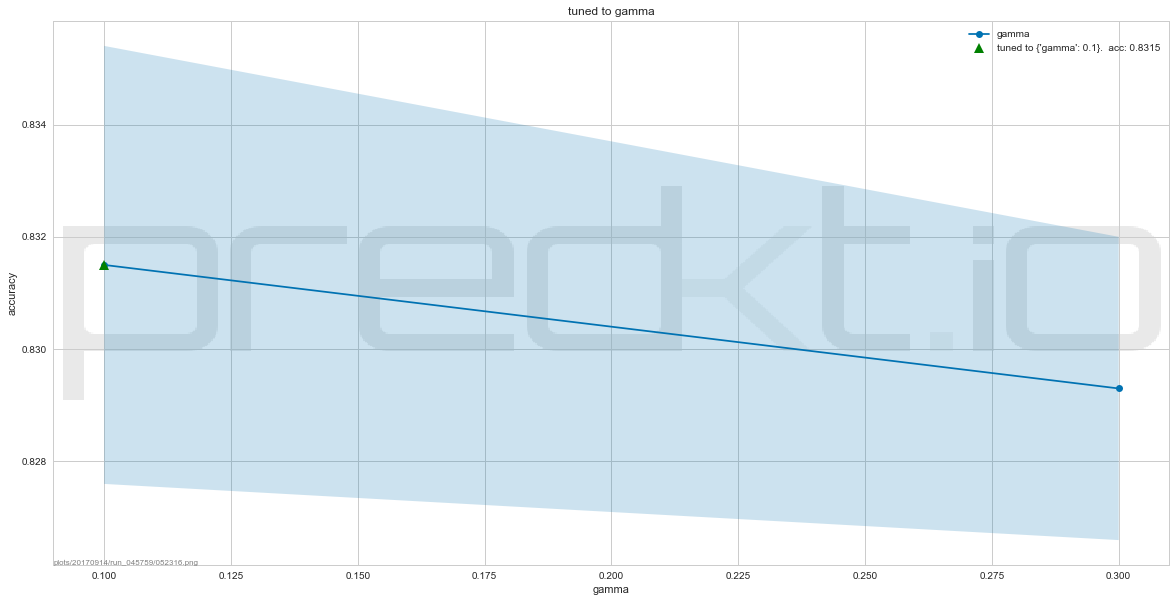

Current Iteration  {'gamma': 0.1}  CV Accuracy  0.8315  Validation Accuracy  0.9163
parameter gamma
result: 0.1  step: 0.1  allowed_range: [0, 1]  seen: [0.2, 0.5, 0.8, 0.3, 0.1]
[]
Extended List : {'gamma': [0.1]}
-------------------------------


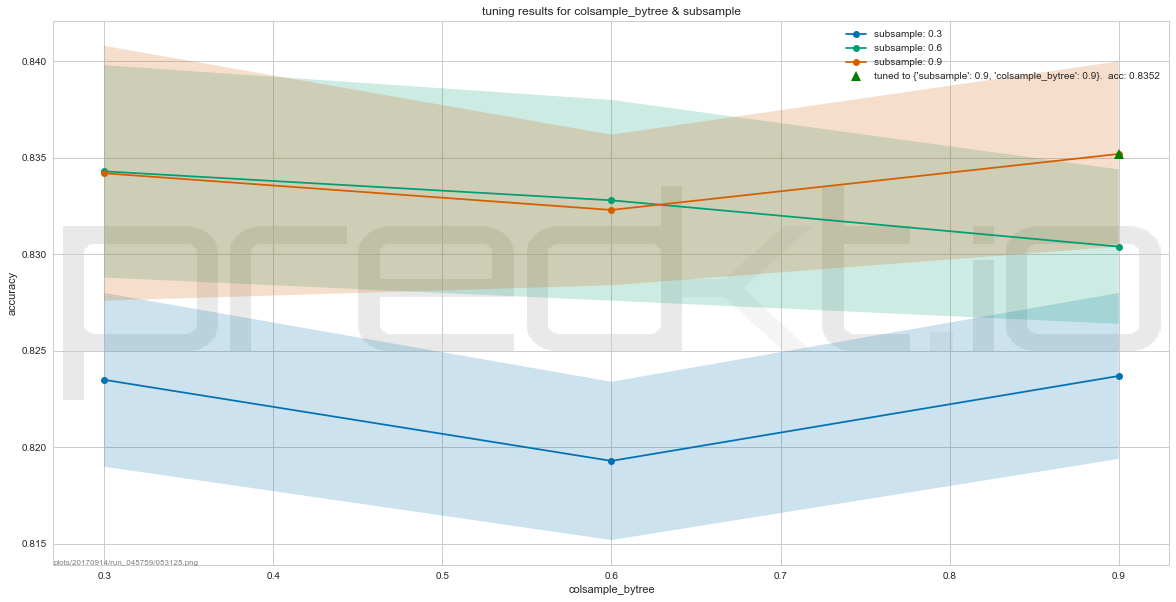

Current Iteration  {'subsample': 0.9, 'colsample_bytree': 0.9}  CV Accuracy  0.8352  Validation Accuracy  0.9148
parameter subsample
result: 0.9  step: 0.05  allowed_range: [0, 1]  seen: [0.3, 0.6, 0.9]
[0.95, 0.85]
parameter colsample_bytree
result: 0.9  step: 0.05  allowed_range: [0, 1]  seen: [0.3, 0.6, 0.9]
[0.95, 0.85]
Extended List : {'colsample_bytree': [0.95, 0.85], 'subsample': [0.95, 0.85]}
-------------------------------


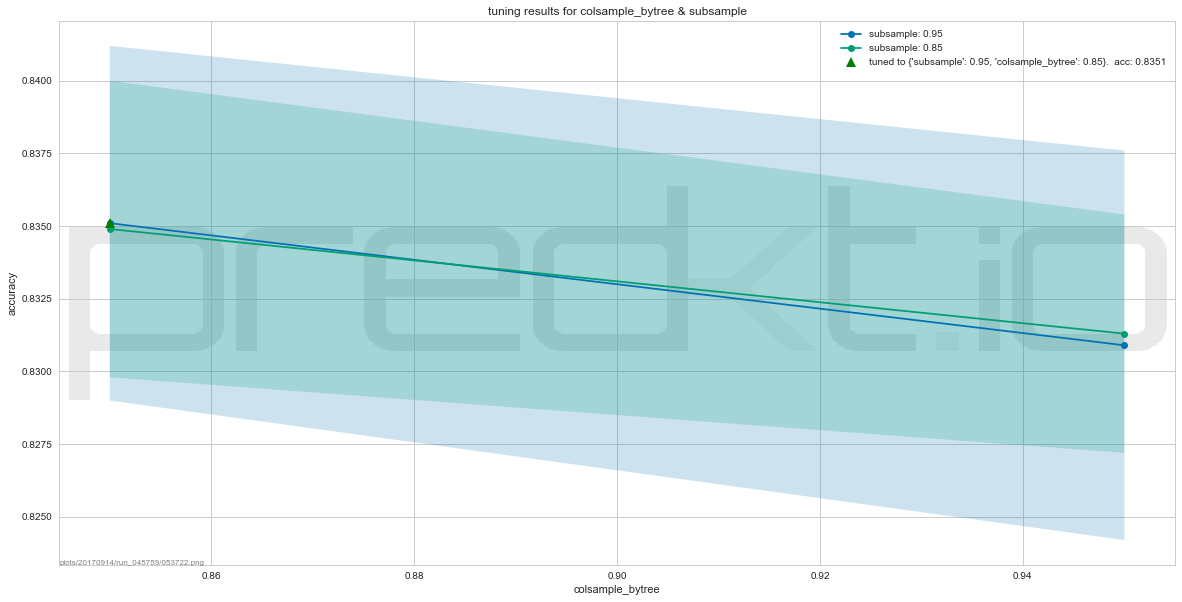

Current Iteration  {'subsample': 0.95, 'colsample_bytree': 0.85}  CV Accuracy  0.8351  Validation Accuracy  0.9187
parameter subsample
result: 0.95  step: 0.05  allowed_range: [0, 1]  seen: [0.3, 0.6, 0.9, 0.95, 0.85]
[1.0]
parameter colsample_bytree
result: 0.85  step: 0.05  allowed_range: [0, 1]  seen: [0.3, 0.6, 0.9, 0.95, 0.85]
[0.8]
Extended List : {'colsample_bytree': [0.8], 'subsample': [1.0]}
-------------------------------


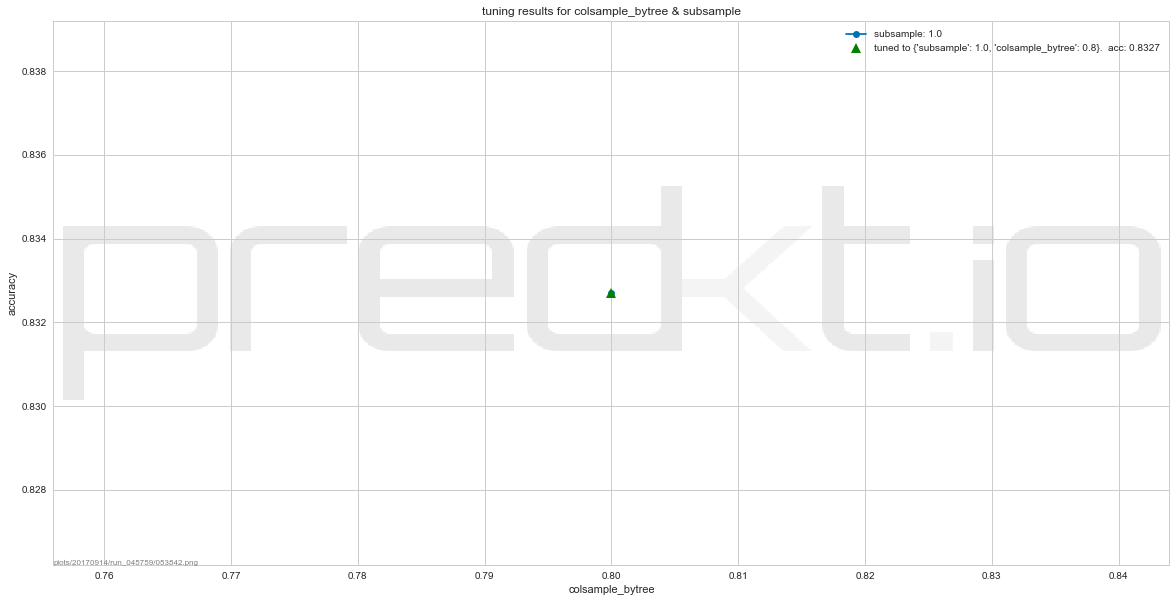

Current Iteration  {'subsample': 1.0, 'colsample_bytree': 0.8}  CV Accuracy  0.8327  Validation Accuracy  0.9166
parameter subsample
result: 1.0  step: 0.05  allowed_range: [0, 1]  seen: [0.3, 0.6, 0.9, 0.95, 0.85, 1.0]
[]
parameter colsample_bytree
result: 0.8  step: 0.05  allowed_range: [0, 1]  seen: [0.3, 0.6, 0.9, 0.95, 0.85, 0.8]
[0.75]
Extended List : {'colsample_bytree': [0.75], 'subsample': [1.0]}
-------------------------------


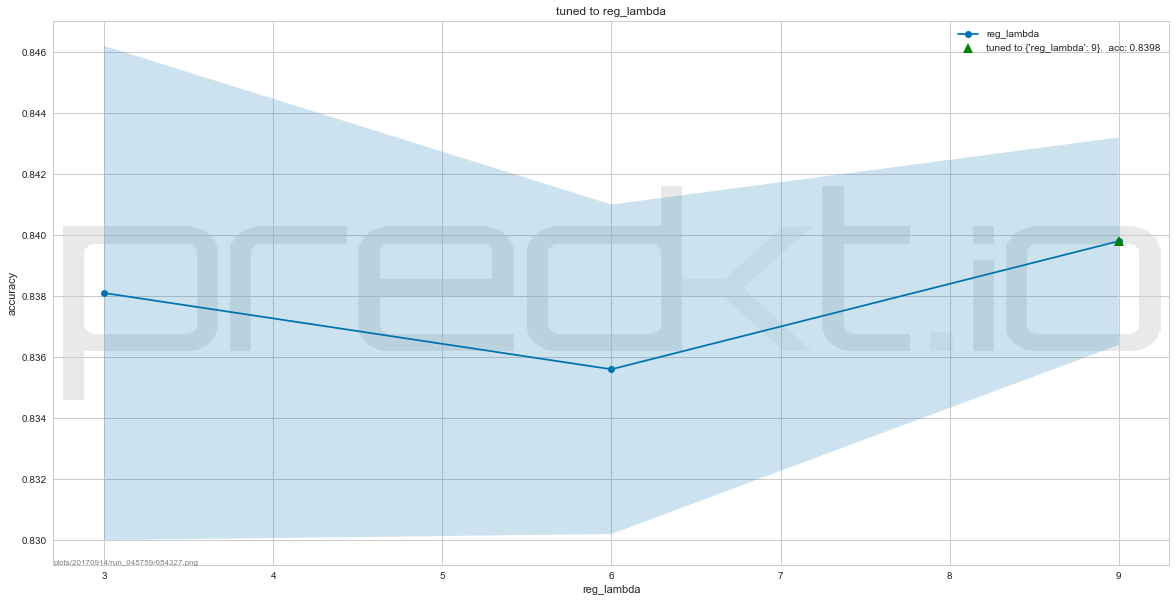

Current Iteration  {'reg_lambda': 9}  CV Accuracy  0.8398  Validation Accuracy  0.9191
parameter reg_lambda
result: 9  step: 0.25  allowed_range: [1, 10]  seen: [3.0, 6.0, 9.0]
[9.25, 8.75]
Extended List : {'reg_lambda': [9.25, 8.75]}
-------------------------------


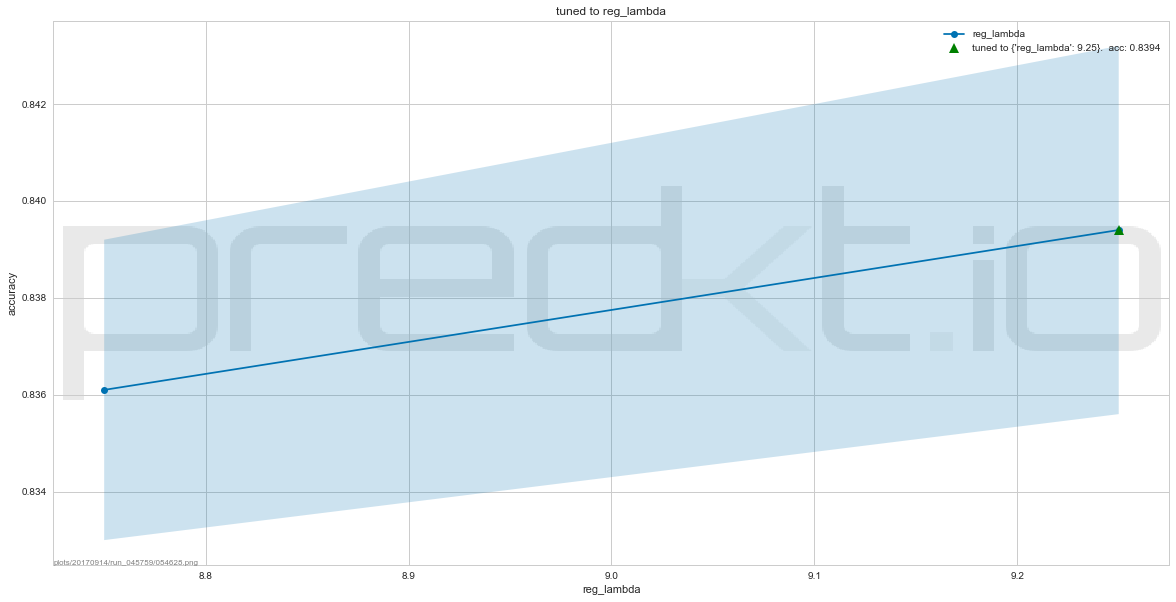

Current Iteration  {'reg_lambda': 9.25}  CV Accuracy  0.8394  Validation Accuracy  0.919
parameter reg_lambda
result: 9.25  step: 0.25  allowed_range: [1, 10]  seen: [3.0, 6.0, 9.0, 9.25, 8.75]
[9.5]
Extended List : {'reg_lambda': [9.5]}
-------------------------------


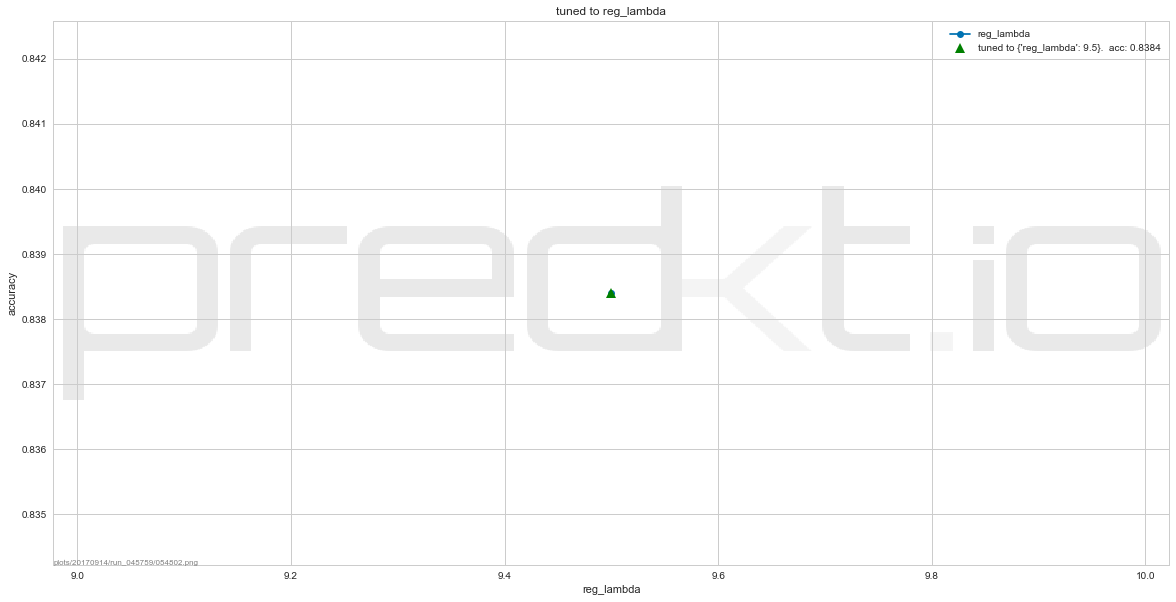

Current Iteration  {'reg_lambda': 9.5}  CV Accuracy  0.8384  Validation Accuracy  0.9195
parameter reg_lambda
result: 9.5  step: 0.25  allowed_range: [1, 10]  seen: [3.0, 6.0, 9.0, 9.25, 8.75, 9.5]
[9.75]
Extended List : {'reg_lambda': [9.75]}
-------------------------------


In [ ]:
tuning_rounds = 3
tuner_params =[{'max_depth':[3,6,9], 'min_child_weight':[3,6,9]},
            {'gamma':[.2,.5,.8]},
            {'subsample':[.3, .6, .9], 'colsample_bytree':[.3,.6, .9]},
            {'reg_lambda':[3, 6, 9] }]

for i in range(len(tuner_params)):
    final_result = hf.tuner_cv(valid_dataset, valid_labels, test_dataset, test_labels, tuner_params[i], tuning_rounds, steps, allowed_ranges, context, cv=3)       

In [ ]:
# Now tune reg_alpha
best_alpha ={}
pickled = hf.pickler(context['pickle'])
parameters = pickled['optimal parameters']
param_test = {'reg_alpha':[0, 0.001, 0.005, 0.01, 0.05] }

estimator = XGBClassifier(**parameters)

gsearch_alpha = GridSearchCV(estimator = estimator, 
                        param_grid = param_test, 
                        scoring= 'accuracy',
                        n_jobs= -1,
                        cv= 5)
optimal_alpha = gsearch_alpha.fit(train_dataset,train_labels)
gs_plot = hf.plot_grid_search(optimal_alpha, param_test, context)

#print('Best parameter', optimal_alpha.best_params_, 'CV Accuracy: ', optimal_alpha.best_score_)
# Update the parameters list with best scoring parameter
parameters.update({k: optimal_alpha.best_params_[k] for k in optimal_alpha.best_params_})


# Update the pickle
updated_pickle = hf.pickler(context['pickle'], parameters, 'optimal parameters')

# Write to summary file
best_alpha.update({'Chosen:':str(optimal_alpha.best_params_) + ' CV Score:' + str(optimal_alpha.best_score_)})   
hf.write_dict(best_alpha, context['summary'],'alpha Grid Search Result')

In [ ]:
# Now lower learning rate and find optimal number of boosters
pickled = hf.pickler(context['pickle'])
parameters = pickled['optimal parameters']
parameters.update({'n_estimators': 5000})
parameters.update({'learning_rate': 0.01})

final_tuner = tree_tuner = XGBClassifier(**parameters)

optimal_model = hf.modelfit(final_tuner,trial_datasets, trial_labels, context, 'merror', num_labels = num_labels, cv_folds=5)



In [ ]:
#End Heap
hf.objects_growth(context['summary'], 'End Heap')

pickled = hf.pickler(context['pickle'])

attachments = []
for (dirpath, dirnames, filenames) in walk(pickled['run context']['plot path']):
    for f in filenames:
        file_path = str(pickled['run context']['plot path'] + f)
        attachments.append(file_path)
    break

# add summary file to list of attachments
attachments.append(context['summary'])


# compose summary and send via email
subject = 'With Charts'

body = pprint.pformat(pickled)


hf.send_email(subject, '<pre>' + pprint.pformat(pickled) + '</pre>', version_list_html,attachments, context)
